# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import pandas as pd
from sklearn.metrics import r2_score


In [3]:
tips = sns.load_dataset("tips").dropna().copy()
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct']  = tips['tip'] / tips['total_bill']

In [4]:

formula_base = "tip ~ C(sex) + C(smoker) + C(time) + net_bill"




In [5]:
#1)
y_base, X_base = dmatrices(formula_base, data=tips, return_type='dataframe')




In [6]:
# 2) Ajustes
m_base = sm.OLS(y_base, X_base).fit()
print(m_base.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.64e-20
Time:                        19:08:46   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.24

In [7]:

m1 = smf.ols('tip ~ net_bill', data=tips).fit()
print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           5.02e-23
Time:                        19:08:46   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

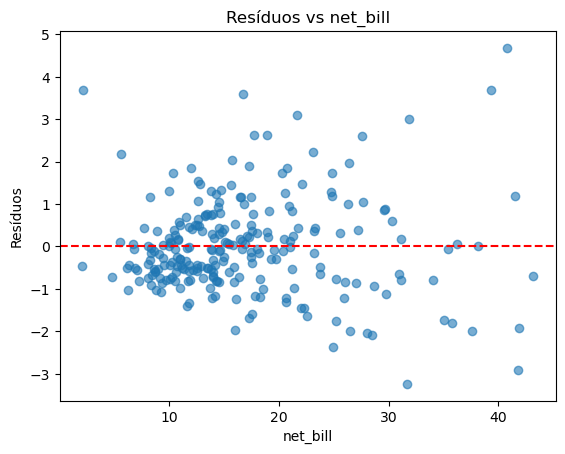

In [8]:
#Resido vs o Net

m = m_refit if 'm_refit' in globals() else m_base

plt.scatter(tips['net_bill'], m.resid, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill")
plt.show()

In [9]:
#4

tips["log_net_bill"] = np.log(tips["net_bill"].clip(lower=1e-6))
m_log = smf.ols("tip ~ log_net_bill", data=tips).fit()
print(m_log.summary())

# Polinômio
m_poly = smf.ols("tip ~ net_bill + I(net_bill**2)", data=tips).fit()
print(m_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           4.40e-20
Time:                        19:08:46   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2575      0.430     -2.924   

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
formula2 = "np.log(tip) ~ C(sex) + C(smoker) + C(time) + net_bill"

y2, X2 = dmatrices(formula2, data=tips, return_type='dataframe')
m2 = sm.OLS(y2, X2).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           1.21e-18
Time:                        19:08:47   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.07

In [11]:
# removendo variaveis:


m2_refit = smf.ols("np.log(tip) ~ net_bill", data=tips).fit()
print(m2_refit.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.60e-21
Time:                        19:08:47   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

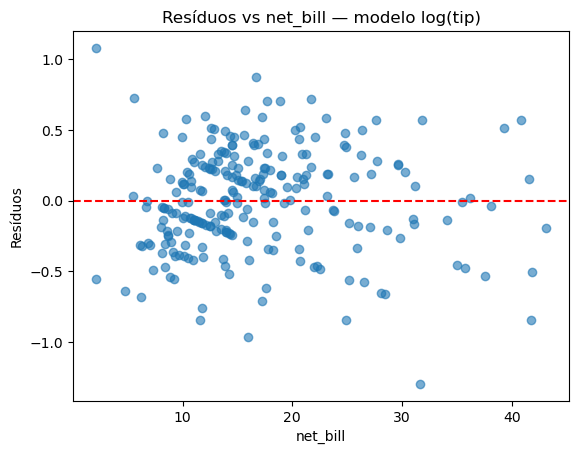

In [12]:
# Gráfico de resíduos
m = m2_refit if 'm2_refit' in globals() else m2

plt.scatter(tips['net_bill'], m.resid, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill — modelo log(tip)")
plt.show()

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           5.62e-22
Time:                        19:08:47   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

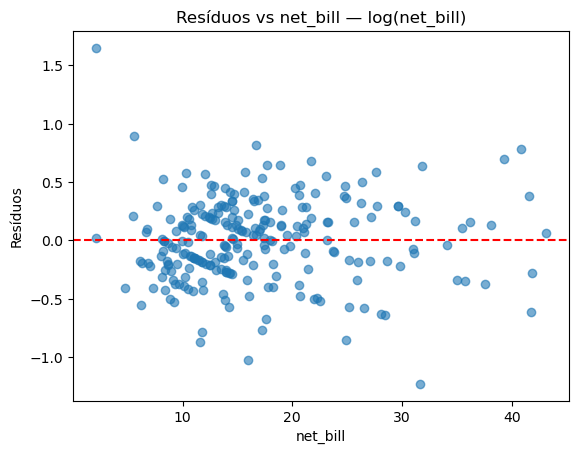

In [13]:
#transformações em net_bill

tips["log_net_bill"] = np.log(tips["net_bill"].clip(lower=1e-6))

y2_log, X2_log = dmatrices("np.log(tip) ~ log_net_bill", data=tips, return_type='dataframe')
m2_log = sm.OLS(y2_log, X2_log).fit()
print(m2_log.summary())

plt.scatter(tips['net_bill'], m2_log.resid, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel("net_bill"); plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill — log(net_bill)")
plt.show()

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.82e-22
Time:                        19:08:48   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111  

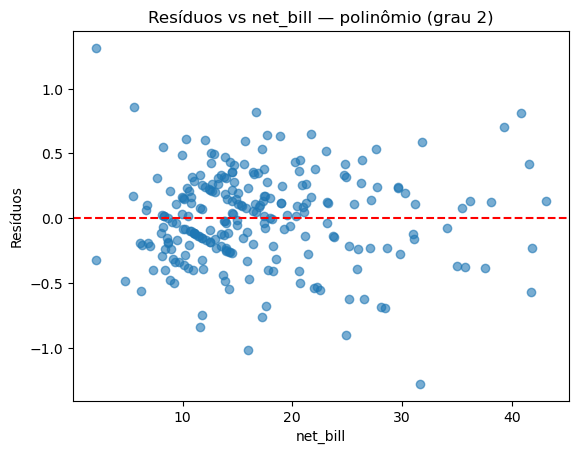

In [14]:
#Polinômio (grau 2)

y2_poly, X2_poly = dmatrices("np.log(tip) ~ net_bill + I(net_bill**2)",
                             data=tips, return_type='dataframe')
m2_poly = sm.OLS(y2_poly, X2_poly).fit()
print(m2_poly.summary())

plt.scatter(tips['net_bill'], m2_poly.resid, alpha=0.6)
plt.axhline(0, color='red', ls='--')
plt.xlabel("net_bill"); plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill — polinômio (grau 2)")
plt.show()

In [15]:
y_pred_log = m2_poly.predict(X2_poly)


y_pred = np.exp(y_pred_log)


r2_ex3 = r2_score(tips["tip"], y_pred)
print("R² na escala original - polinômio:", r2_ex3)


y_pred_item1 = m1.predict(tips)
r2_item1 = r2_score(tips["tip"], y_pred_item1)
print("R² na escala origina:", r2_item1)

R² na escala original - polinômio: 0.30903042569314354
R² na escala origina: 0.3325407312323706


# Se a análise estiver correta, o melhor modelo seria o de Polinomio, porque o R² ficou o maior dos 3 e teve o melhor AIC

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [16]:
base_renda = pd.read_csv("Profissão Cientista de Dados M12 - previsao_de_renda.csv")


In [17]:
base_renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [24]:
df = base_renda.drop(columns=["Unnamed: 0","data_ref","id_cliente"])
df = df.dropna(subset=["tempo_emprego","renda"])


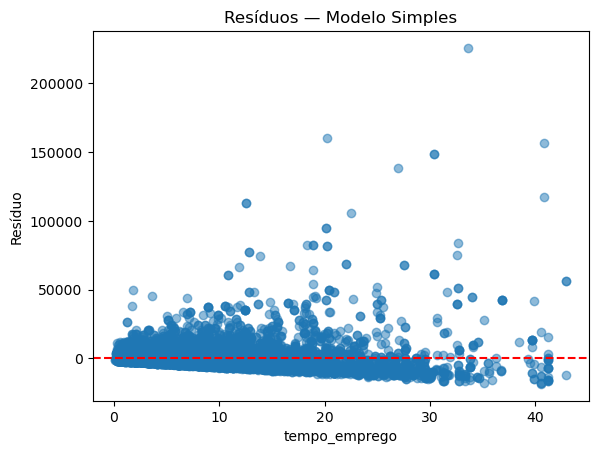

In [26]:
#Regressão simples:

m1 = smf.ols("renda ~ tempo_emprego", data=base_renda).fit()

#plot dela 
residuo = m1.resid
plt.scatter(df["tempo_emprego"], residuo, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("tempo_emprego"); plt.ylabel("Resíduo")
plt.title("Resíduos — Modelo Simples")
plt.show()



                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:12:43   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

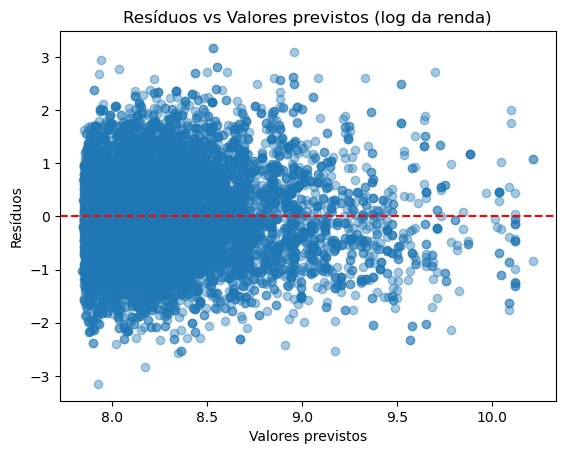

In [27]:
# Regressão com Log
m2 = smf.ols("np.log(renda) ~ tempo_emprego", data=base_renda).fit()
print(m2.summary())


plt.scatter(m2.fittedvalues, m2.resid, alpha=0.4)
plt.axhline(0, color="red", ls="--")
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores previstos")
plt.show()

In [28]:
m2 = smf.ols(
    "np.log(renda) ~ tempo_emprego + idade + qtd_filhos + qt_pessoas_residencia + \
     C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda) + \
     C(educacao) + C(estado_civil) + C(tipo_residencia)",
    data=df
).fit()

print(m2.summary())



                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:13:59   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [31]:
modelo_final = "np.log(renda) ~ idade + tempo_emprego + qtd_filhos + qt_pessoas_residencia + \
                 C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
                 C(tipo_renda) + C(estado_civil)"

m_refit = smf.ols(modelo_final, data=base_renda).fit()
print(m_refit.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     453.1
Date:                Thu, 25 Sep 2025   Prob (F-statistic):               0.00
Time:                        19:30:47   Log-Likelihood:                -13603.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12411   BIC:                         2.736e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

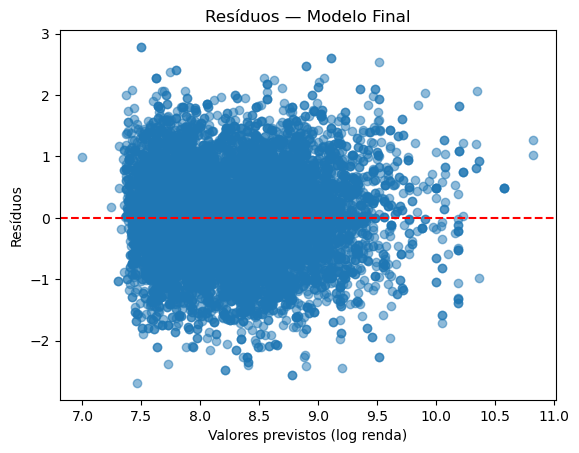

In [33]:
residuo2 = m_refit.resid
plt.scatter(m_refit.fittedvalues, residuo2, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores previstos (log renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos — Modelo Final")
plt.show()

